# Numpy基礎

In [1]:
# numpyをインポートして名前をnpにする．numpyのメソッドは，np.***で使える．
import numpy as np

In [2]:
# 行列
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [3]:
# ベクトル
x = np.array([[1],[2],[3]])
print(x)

[[1]
 [2]
 [3]]


In [4]:
# 行列とベクトルの演算
b = np.dot(A, x)
print(b)

[[14]
 [32]
 [50]]


In [5]:
# こちらは違う
A * x

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

In [6]:
# わかりやすく実行すると
A= np.array([[1,2,3],[4,5,6],[7,8,9]])
x = np.array([[10],[100],[1000]])
A * x

array([[  10,   20,   30],
       [ 400,  500,  600],
       [7000, 8000, 9000]])

In [7]:
#  定数倍
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

### 課題1
次の計算をせよ．  
また，自分自身で手計算して確かめよ．

$$
A = 
\begin{pmatrix}
    2 & 0 & 4\\
    1 & 1 & -3
\end{pmatrix}
$$

$$
B = 
\begin{pmatrix}
    5 & 7 & 3\\
    2 & 0 & -1
\end{pmatrix}
$$

$$
2A+3B
$$

$$
A^T B
$$

In [8]:
# ゼロで初期化
A = np.zeros((3,4))
print(A)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [9]:
# 1で初期化
A = np.ones((3,4))
print(A)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [10]:
# 1で初期化
A = np.eye((5))
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [11]:
# 乱数で初期化(0.0から1.0の一様乱数)
A = np.random.rand(2,3)
print(A)

[[0.46896108 0.26085903 0.62693368]
 [0.37835108 0.58813699 0.69120275]]


In [12]:
# 転値
A = np.array([[1,2],[3,4]])
print(A)
print(A.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [13]:
# 固有値，固有ベクトル
A = np.array([[6,2],[2,3]])
la, v = np.linalg.eig(A)
print(la)
print(v)

[7. 2.]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [14]:
# 逆行列
A = np.array([[1,2],[3,4]])
invA = np.linalg.inv(A)
print(invA)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [15]:
# 逆行列の検算
np.dot(A,invA)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [16]:
# 内積(以前の方法)
a = np.array([[1],[2],[3]])
b = np.array([[4],[5],[6]])
np.dot(a.T, b)

array([[32]])

In [17]:
# 内積の検算
1*4+2*5+3*6

32

In [18]:
# 縦ベクトル
a = np.array([[1],[2],[3]])
print(a)

[[1]
 [2]
 [3]]


In [19]:
# 横ベクトル
a = np.array([[1],[2],[3]])
print(a.T)

[[1 2 3]]


### 課題2

次の行列の逆行列を求めよ．  
また，自分自身で手計算して確かめよ．

$$
A = 
\begin{pmatrix}
    5 & 4 \\
    3 & 2
\end{pmatrix}
$$

## 連立1次方程式を解いてみる

$$
\begin{cases}
    x+5y=15\\
    -2x+y=-8
\end{cases}
$$

In [20]:
# 行列A
A = np.array([[1,5],[-2,1]])

# ベクトルb
b = np.array([[15],[-8]])

In [21]:
# 連立1次方程式Ax = bを解く
#
# 公式を使って逆行列を求めて，解を求める

invA = 1/(A[0,0]*A[1,1] - A[0,1]*A[1,0])*np.array([[A[1,1],-1*A[0,1]],[-1*A[1,0],A[0,0]]])
x = np.dot(invA, b)
print(x)

[[5.]
 [2.]]


2行2列の行列Aの逆行列は以下の公式で求められる．  
$$
A = 
\begin{pmatrix}
    a & b\\
    c & d
\end{pmatrix}
$$

$$
A^{-1}
=
\frac{1}{ad-bc}
\begin{pmatrix}
    d & -b\\
    -c & a
\end{pmatrix}
$$

In [22]:
# 連立1次方程式Ax = bを解く
#
# Numpyで逆行列を求めて，解を求める

invA = np.linalg.inv(A)
x = np.dot(invA, b)
print(x)

[[5.]
 [2.]]


In [23]:
# 連立1次方程式Ax = bを解く
#
# Numpyで連立1次方程式を解く

x = np.linalg.solve(A, b)
print(x)

[[5.]
 [2.]]


In [24]:
# 確認
np.dot(A,x)

array([[15.],
       [-8.]])

## 連立1次方程式を視覚化する（matplotlibの練習を兼ねて）

$$
\begin{cases}
    x+5y=15\\
    -2x+y=-8
\end{cases}
$$

$$
\begin{cases}
    y=-1/5x+3\\
    y=2x-8
\end{cases}
$$

In [25]:
# グラフ表示したい関数A
def mathfuncA(x):
    y = -1.0/5.0*x+3.0
    return y

In [26]:
# グラフ表示したい関数B
def mathfuncB(x):
    y = 2.0*x-8
    return y

In [27]:
mathfuncA(5)

2.0

In [28]:
mathfuncB(5)

2.0

In [29]:
# 作成した関数のグラフを表示する
import matplotlib.pyplot as plt

# 定義域を設定
xmin = 0.0
xmax = 8.0
num = 100 # xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# 関数から値域を取得
y = mathfuncA(x)
# 点どうしを直線でつなぐ
plt.plot(x, y,color='red')


# 関数から値域を取得
y = mathfuncB(x)
# 点どうしを直線でつなぐ
plt.plot(x, y,color='blue')

# 適切な表示範囲を指定
plt.xlim(xmin, xmax)

# グリッド追加
plt.grid(True)

# 表示
plt.show()

<Figure size 640x480 with 1 Axes>

### 課題3
3元連立1次方程式を解け．  
また，自分自身で手計算して確かめよ．

$$
\begin{cases}
   2x+3y-5z=3\\
    x-y+z=0\\
    3x-6y+2z=-7
\end{cases}
$$

### 何か関数を表示したいときは以下のサンプルプログラムを使うと良い

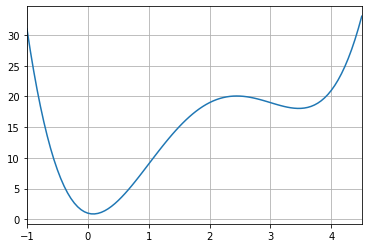

In [31]:
import numpy as np
import matplotlib.pyplot as plt

###############
# グラフ表示したい関数
###############
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x + 1
    return y


#######################
# 作成した関数のグラフを表示する
#######################

# 定義域を設定
xmin = -1.0
xmax = 4.5
num = 100 # xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# 関数から値域を取得
y = mathfunc(x)

# 点どうしを直線でつなぐ
plt.plot(x, y)

# 適切な表示範囲を指定
plt.xlim(xmin, xmax)

# グリッド追加
plt.grid(True)

# 表示
plt.show()